In [123]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
# pd.set_option('display.width', 1000)
# pd.set_option('display.max_columns', None)


In [75]:
df = fetch_openml(name = 'credit-g', version= 1)
x = df.data
y = df.target
x.describe().columns
y.describe()
# x.info()
numericke = list(x.describe().columns)
kategorije = list(set(x.columns) - set(numericke))

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numericke),
                                               ('kat', OneHotEncoder(drop='first', handle_unknown='ignore'), kategorije)])

logreg = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(max_iter=4000, C = 7))  
])
svc = Pipeline([
    ('preprocessing', preprocessor),
    ('model', SVC(C=8))  
])
def namesti(model):
    model.fit(xtrain, ytrain)
    pred = model.predict(xtest)    
    print(f"Tačnost modela: {accuracy_score(ytest, pred):.4f}")
    print(confusion_matrix(ytest, pred), ytest.value_counts())
    print(f"\nModel: {model.named_steps['model'].__class__.__name__}")


In [9]:
namesti(logreg)

Tačnost modela: 0.8100
[[ 35  24]
 [ 14 127]] class
good    141
bad      59
Name: count, dtype: int64

Model: LogisticRegression


In [91]:
y_numeric = y.map({'bad': 0, 'good': 1})
y_numeric

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

In [93]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y_numeric, test_size=0.2, random_state=42)

In [187]:
trening = np.linspace(150, len(xtrain), 100).astype(int)
f1trainlogit = []
for i in trening:
    xs = xtrain.iloc[:i]
    ys = ytrain.iloc[:i]
    logreg.fit(xs,ys)
    pred = logreg.predict(xs)
    score = f1_score(ys, pred, average='binary')
    f1trainlogit.append(score)

f1testlogit = []
for i in trening:
    xs = xtrain.iloc[:i]
    ys = ytrain.iloc[:i]
    logreg.fit(xs,ys)
    pred = logreg.predict(xtest)
    score = f1_score(ytest, pred, average='binary')
    f1testlogit.append(score)

C:\Users\Jelena\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Jelena\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Jelena\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Jelena\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Jelena\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning:

In [195]:
f1testlogit[0],f1testlogit[-1]

(0.7898550724637681, 0.8698630136986302)

In [197]:
f1trainlogit[0],f1trainlogit[-1]

(0.9209302325581395, 0.8473998294970162)

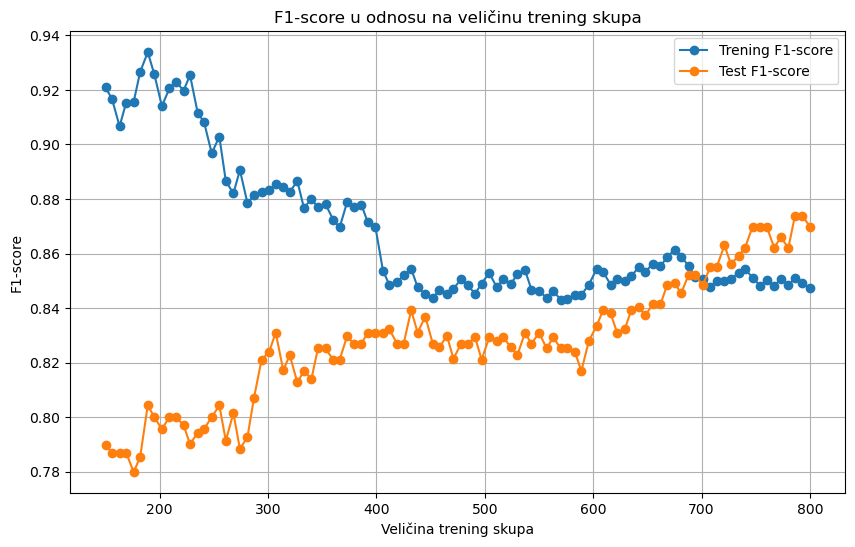

In [199]:
plt.figure(figsize=(10, 6))
plt.plot(trening, f1trainlogit, marker='o', label='Trening F1-score')
plt.plot(trening, f1testlogit, marker='o',label='Test F1-score')
plt.xlabel("Veličina trening skupa")
plt.ylabel("F1-score")
plt.title("F1-score u odnosu na veličinu trening skupa")
plt.grid(True)
plt.legend()
plt.show()

In [205]:
trening = np.linspace(150, len(xtrain), 100).astype(int)
f1trainsvc = []
for i in trening:
    xs = xtrain.iloc[:i]
    ys = ytrain.iloc[:i]
    svc.fit(xs,ys)
    pred = svc.predict(xs)
    score = f1_score(ys, pred, average='binary')
    f1trainsvc.append(score)

f1testsvc = []
for i in trening:
    xs = xtrain.iloc[:i]
    ys = ytrain.iloc[:i]
    svc.fit(xs,ys)
    pred = svc.predict(xtest)
    score = f1_score(ytest, pred, average='binary')
    f1testsvc.append(score)

C:\Users\Jelena\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Jelena\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Jelena\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Jelena\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Jelena\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning:

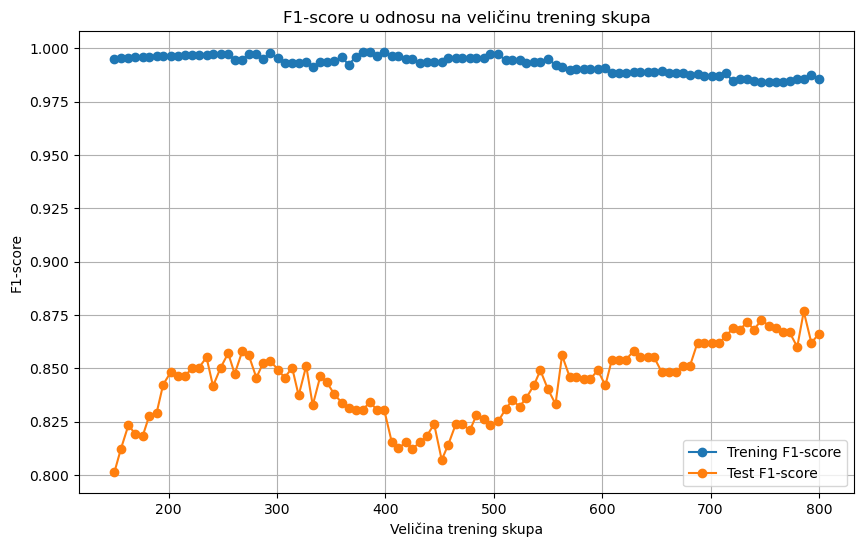

In [207]:
plt.figure(figsize=(10, 6))
plt.plot(trening, f1trainsvc, marker='o', label='Trening F1-score')
plt.plot(trening, f1testsvc, marker='o',label='Test F1-score')
plt.xlabel("Veličina trening skupa")
plt.ylabel("F1-score")
plt.title("F1-score u odnosu na veličinu trening skupa")
plt.grid(True)
plt.legend()
plt.show()

In [213]:
f1testsvc[0],f1testsvc[-1], f1trainsvc[0],f1trainsvc[-1]

(0.8013937282229965,
 0.8661971830985915,
 0.9952153110047847,
 0.9858407079646018)

In [11]:
namesti(svc)

Tačnost modela: 0.8100
[[ 39  20]
 [ 18 123]] class
good    141
bad      59
Name: count, dtype: int64

Model: SVC


In [ ]:
naziv = preprocessor.get_feature_names_out()

In [ ]:
theta = logreg.named_steps['model'].coef_[0]
theta

In [ ]:
vaznost = pd.DataFrame({'Feature': naziv, 'Importance': theta}).sort_values(by='Importance', ascending=False)
vaznost

In [ ]:
svc = Pipeline([
    ('preprocessing', preprocessor),
    ('model', SVC(C=8))  
])
fit(svc)